In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io

### Problem 1. Basis Vectors in 2D Coordinate Space

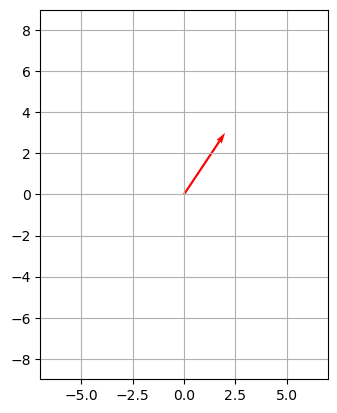

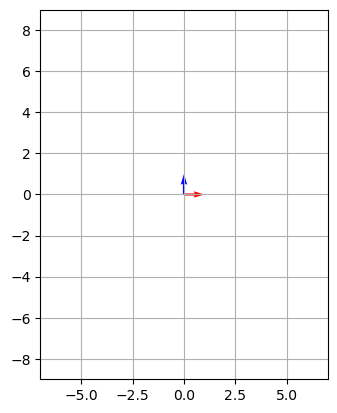

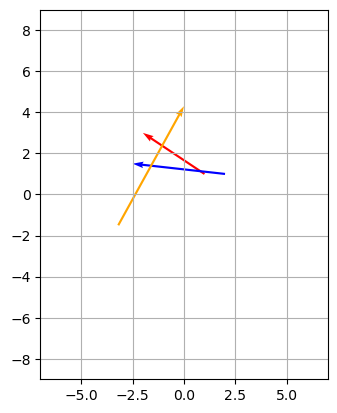

In [3]:
#plot vectors
def plot_vectors(vectors, colors):
  # start_x = [v[0] for v in vectors] we can use numpy for the same result
  # start_y = [v[1] for v in vectors]
  
  vectors_array = np.array(vectors)
  
  start_x = vectors_array[:, 0]
  start_y = vectors_array[:, 1]
  end_x = vectors_array[:, 2]
  end_y = vectors_array[:, 3]
  
  # plt.quiver does not take end_x and end_y, but start_x, start_y and length(length is end_x, end_y - start_x, start-y)
  length_x = end_x - start_x
  length_y = end_y - start_y
  
  plt.quiver(start_x, start_y, length_x, length_y, color = colors, scale_units = "xy", angles = "xy", scale = 1)
  plt.xlim(-7, 7)
  plt.ylim(-9, 9) 
  
  plt.grid()
  plt.gca().set_aspect("equal")
  
  #crossing points for the last plotting vectors
  # plt.axvline(1, linestyle = "dotted", color = "black")
  # plt.axhline(1, linestyle = "dotted", color = "black")
  
  # plt.axvline(-2, linestyle = "dotted", color = "magenta")
  # plt.axhline(3, linestyle = "dotted", color = "magenta")
  
  plt.show()
  
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

In [4]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """
    T_matrix = np.array([e1, e2]).T
    coef = np.linalg.solve(T_matrix, v)
    return coef

Coefficients:  [3.5 8.6]


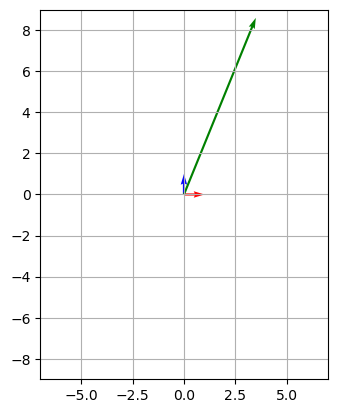

In [5]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
# f = [e1, e2, v]
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])


Coefficients:  [2.73529412 0.39411765]


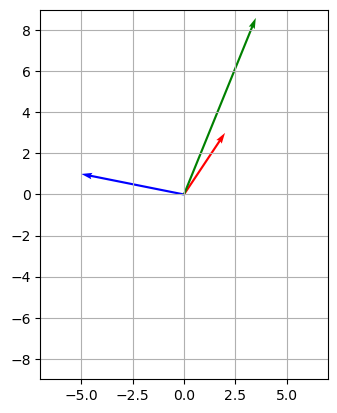

In [6]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Coefficients:  [1.796 0.472]


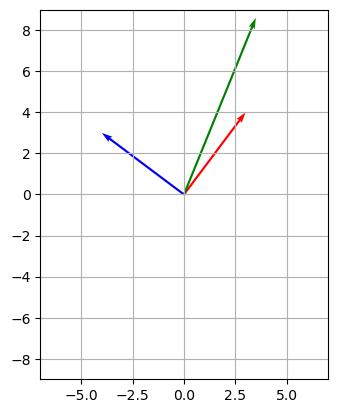

In [7]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Coefficients:  [1.72  0.875]


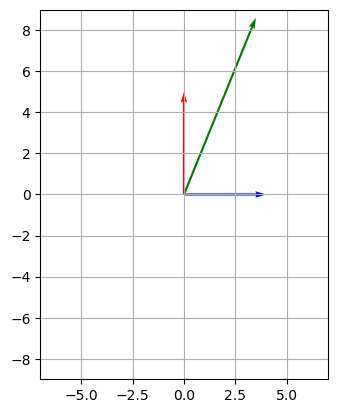

In [8]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

### 1.1 Additional Info to Problem 1.

In [9]:
# calculating vectors length
vector_e1 = [3, 4]
vector_length = np.sqrt(vector_e1[0] ** 2 + vector_e1[1] ** 2)
print(f"1.Vector length: {vector_length}")

# calculating vectors length with norm
vector_len_norm = np.linalg.norm(vector_e1, 2) # 2 is the norm (2, 1, infinity, 0)
vector_max_len = np.linalg.norm(vector_e1, np.inf)
print(f"2.Vector lenght with norm: {vector_len_norm}")
print(f"3.Vector max lenght with norm: {vector_max_len}")

1.Vector length: 5.0
2.Vector lenght with norm: 5.0
3.Vector max lenght with norm: 4.0


In [10]:
%%timeit
# normal loop
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]

354 ns ± 0.77 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [11]:
%%timeit
# numpy func with normal array
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)

4.19 µs ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%%timeit
# numpy arr with numpy func
x = [2, 3, 8, -2.3, 0, 15]
num_py_arr = np.array(x)
numpy_sum = np.sum(x)

4.89 µs ± 37 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
x = np.random.randint(1, 100, size = 50000)